In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Import data

1. plot_summaries.txt

Plot summaries of 42,306 movies extracted from the November 2, 2012 dump of English-language Wikipedia.  Each line contains the Wikipedia movie ID (which indexes into movie.metadata.tsv) followed by the summary.

In [27]:
#with open('data/MovieSummaries/plot_summaries.txt', encoding='utf8') as f:
#    lines = f.read()
#    print(lines)
    

################################ Balth: J'ai des problèmes avec les lignes en dessus...

colnames = ['Wikipedia_movie_ID', 'Summary'] 

df = pd.read_csv('data/MovieSummaries/plot_summaries.txt', names = colnames, header = None, sep="\t", on_bad_lines='warn')
df


,Wikipedia_movie_ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


2. corenlp_plot_summaries.tar.gz [628 M, separate download]

The plot summaries from above, run through the Stanford CoreNLP pipeline (tagging, parsing, NER and coref). Each filename begins with the Wikipedia movie ID (which indexes into movie.metadata.tsv).

In [28]:
# Reading the data inside the xml.gz file to a variable under the name data
import gzip
path_corenlp = 'data/corenlp_plot_summaries/'
fname = '330.xml.gz'
with gzip.open(path_corenlp+fname, 'rb') as f:
    data = f.read()
    
# Passing the stored data inside the beautifulsoup parser 
bs_data = BeautifulSoup(data, "xml") 

# Finding all instances of tag   
b_unique = bs_data.find_all("lemma") 
print(b_unique) 

[<lemma>in</lemma>, <lemma>order</lemma>, <lemma>to</lemma>, <lemma>prepare</lemma>, <lemma>the</lemma>, <lemma>role</lemma>, <lemma>of</lemma>, <lemma>a</lemma>, <lemma>important</lemma>, <lemma>old</lemma>, <lemma>actress</lemma>, <lemma>,</lemma>, <lemma>a</lemma>, <lemma>theater</lemma>, <lemma>student</lemma>, <lemma>interview</lemma>, <lemma>three</lemma>, <lemma>actress</lemma>, <lemma>who</lemma>, <lemma>be</lemma>, <lemma>she</lemma>, <lemma>pupil</lemma>, <lemma>:</lemma>, <lemma>a</lemma>, <lemma>international</lemma>, <lemma>diva</lemma>, <lemma>,</lemma>, <lemma>a</lemma>, <lemma>television</lemma>, <lemma>star</lemma>, <lemma>and</lemma>, <lemma>a</lemma>, <lemma>dub</lemma>, <lemma>director</lemma>, <lemma>.</lemma>]


3. movie.metadata.tsv.gz [3.4 M]


Metadata for 81,741 movies, extracted from the Noverber 4, 2012 dump of Freebase.  Tab-separated; columns:

1. Wikipedia movie ID
2. Freebase movie ID
3. Movie name
4. Movie release date
5. Movie box office revenue
6. Movie runtime
7. Movie languages (Freebase ID:name tuples)
8. Movie countries (Freebase ID:name tuples)
9. Movie genres (Freebase ID:name tuples)

In [29]:
colnames = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_box office_revenue', 'Movie_runtime', 'Movie_languages', 'Movie_countries' , 'Movie_genres'] 


movie_md_raw = pd.read_csv('data/MovieSummaries/movie.metadata.tsv', sep='\t',names = colnames, header=None)
movie_md = movie_md_raw.copy()
movie_md.rename(columns = {'Movie_box office_revenue':'Movie_boxoffice_revenue'}, inplace = True)
movie_md.sample(5)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_boxoffice_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
6866,12288251,/m/02vz1fg,Birth of a Notion,1947-04-12,NaN,7.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/0hcr"": ""Animat..."
42170,8582821,/m/0278tzk,Al Corazón,1996-03-22,NaN,92.0,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/0jtdp"": ""Documenta..."
14393,32416906,/m/0gysdrt,Finding Me,2009-03-03,NaN,115.0,"{""/m/02h40lc"": ""English Language""}",{},"{""/m/07s9rl0"": ""Drama""}"
53984,4765882,/m/0cm4_m,Unaccustomed As We Are,1929-05-04,NaN,18.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/01z4y"": ""Comed..."
17211,20630769,/m/051vnnf,Trail of the Lonesome Pink,1974-06-27,NaN,NaN,{},{},"{""/m/02hmvc"": ""Short Film"", ""/m/05p553"": ""Come..."


**General description of data**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Wikipedia_movie_ID       81741 non-null  int64  
 1   Freebase_movie_ID        81741 non-null  object 
 2   Movie_name               81741 non-null  object 
 3   Movie_release_date       74839 non-null  object 
 4   Movie_boxoffice_revenue  8401 non-null   float64
 5   Movie_runtime            61291 non-null  float64
 6   Movie_languages          81741 non-null  object 
 7   Movie_countries          81741 non-null  object 
 8   Movie_genres             81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


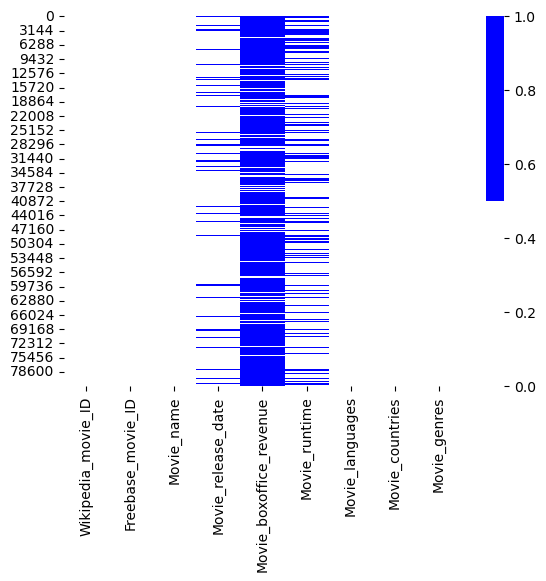

In [30]:
movie_md.info()
sns.heatmap(movie_md.isnull(), cmap=['w','b'])
plt.show()

**Create relational tables for languages, countries and genres**

In [31]:
def string2list(string):
    '''
    Converts string to dictionnary to list
    in order to be able to use pandas.DataFrame.explode()
    '''
    import ast
    
    dic = ast.literal_eval(string)
    new_list  = list(dic.values())
    return new_list


movie_languages = movie_md.copy()
movie_languages.Movie_languages = movie_languages.Movie_languages.apply(lambda x: string2list(x))
movie_languages = movie_languages.explode('Movie_languages', ignore_index = True)
movie_languages = movie_languages.drop(columns=['Freebase_movie_ID', 'Movie_name','Movie_release_date'\
                                                ,'Movie_boxoffice_revenue','Movie_runtime','Movie_countries'\
                                                ,'Movie_genres'])
movie_languages['Movie_languages']= movie_languages['Movie_languages'].astype(str) 

movie_countries = movie_md.copy()
movie_countries['Movie_countries'] = movie_countries['Movie_countries'].apply(lambda x: string2list(x))
movie_countries = movie_countries.explode('Movie_countries', ignore_index = True)
movie_countries = movie_countries.drop(columns=['Freebase_movie_ID', 'Movie_name','Movie_release_date'\
                                                ,'Movie_boxoffice_revenue','Movie_runtime','Movie_languages'\
                                                ,'Movie_genres'])

movie_genres = movie_md.copy()
movie_genres['Movie_genres'] = movie_genres['Movie_genres'].apply(lambda x: string2list(x))
movie_genres = movie_genres.explode('Movie_genres', ignore_index = True)
movie_genres = movie_genres.drop(columns=['Freebase_movie_ID', 'Movie_name','Movie_release_date'\
                                                ,'Movie_boxoffice_revenue','Movie_runtime','Movie_languages'\
                                                ,'Movie_countries'])
movie_genres

,Wikipedia_movie_ID,Movie_genres
0,975900,Thriller
1,975900,Science Fiction
2,975900,Horror
3,975900,Adventure
4,975900,Supernatural
...,...,...
245618,913762,Drama
245619,12476867,Thriller
245620,12476867,Horror
245621,12476867,Slasher


**Clean + distribution of Movie_release_date**

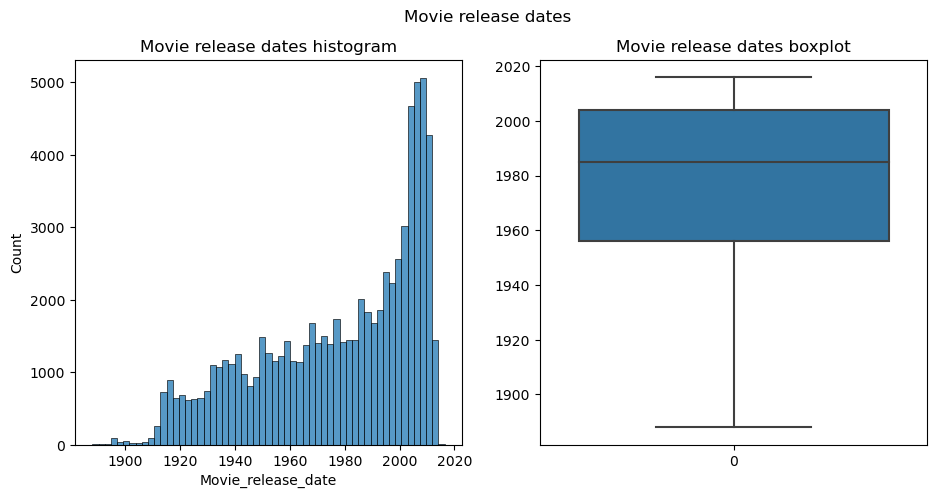

count                            74838
mean     1977-10-12 11:46:07.610037696
min                1888-01-01 00:00:00
25%                1956-01-01 00:00:00
50%                1985-05-18 12:00:00
75%                2004-01-01 00:00:00
max                2016-06-08 00:00:00
Name: Movie_release_date, dtype: object

In [32]:
#movie_md[movie_md.Movie_release_date.isna()]#all missing Movie_release_date are nan

#convert dates to datetimes. Dates with only year are set as the first of January of that year. Date that are out of bounds
#are set as NaT.
movie_md.Movie_release_date = pd.to_datetime(movie_md.Movie_release_date, errors = 'coerce', yearfirst = True)

plt.figure(figsize=[11, 5])
plt.suptitle('Movie release dates')

# Plot 1
plt.subplot(1, 2, 1)
sns.histplot(data=movie_md, x='Movie_release_date')
plt.title('Movie release dates histogram')

# Plot 2
plt.subplot(1, 2, 2)
sns.boxplot(data=movie_md.Movie_release_date.dt.year)
plt.title('Movie release dates boxplot')
plt.show()

movie_md.Movie_release_date.describe(datetime_is_numeric = True)
#movie_md.loc[movie_md.Movie_release_date.dt.year == 1888].Movie_name

There doesn't seem to be any major issues with the movie release dates. Although the earliest movie from the dataset is from 1888 (which raised suspicion) and lasts only 3 seconds, after some research, it is in fact a real 'film'.

**Clean + distribution of Movie_boxoffice_revenue**

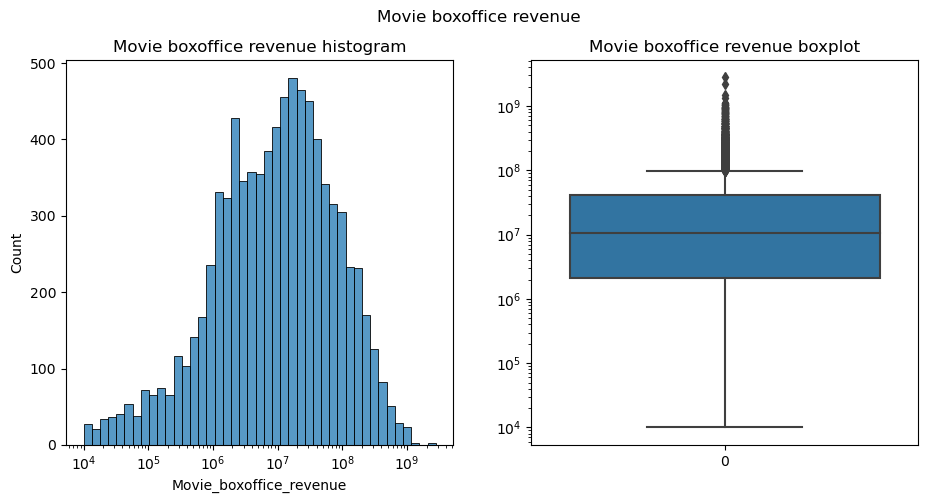

Max revenue: count    8.401000e+03
mean     4.799363e+07
std      1.121753e+08
min      1.000000e+04
25%      2.083193e+06
50%      1.063969e+07
75%      4.071696e+07
max      2.782275e+09
Name: Movie_boxoffice_revenue, dtype: float64


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_boxoffice_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
23702,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


In [33]:
#movie_md[movie_md.Movie_boxoffice_revenue.isna()]#all missing Movie_release_date are nan

plt.figure(figsize=[11, 5])
plt.suptitle('Movie boxoffice revenue')

# Plot 1
plt.subplot(1, 2, 1)
sns.histplot(data=movie_md, x='Movie_boxoffice_revenue',log_scale = True)
plt.title('Movie boxoffice revenue histogram')

# Plot 2
plt.subplot(1, 2, 2)
sns.boxplot(data=movie_md.Movie_boxoffice_revenue)
plt.yscale('log')
plt.title('Movie boxoffice revenue boxplot')
plt.show()

stats = movie_md.Movie_boxoffice_revenue.describe()
print(f'Max revenue: {stats}')
movie_md.loc[movie_md.Movie_boxoffice_revenue == stats[7]]

**Clean + distribution of Movie_runtime**

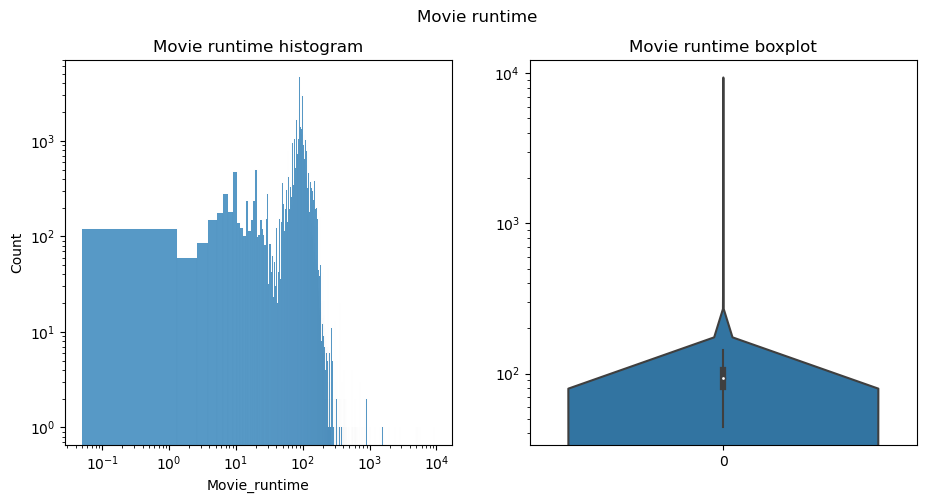

count    61287.000000
mean        93.981244
std         70.681536
min          0.050000
25%         81.000000
50%         93.000000
75%        106.000000
max       9360.000000
Name: Movie_runtime, dtype: float64

In [42]:
#movie_md[movie_md.Movie_runtime.isna()]#all missing Movie_release_date are nan

movie_md.loc[movie_md.Movie_runtime == np.max(movie_md.Movie_runtime), 'Movie_runtime'] = np.nan #wrong max 
movie_md.loc[movie_md.Movie_runtime == np.min(movie_md.Movie_runtime), 'Movie_runtime'] = np.nan #wrong min

plt.figure(figsize=[11, 5])
plt.suptitle('Movie runtime')

# Plot 1
plt.subplot(1, 2, 1)
sns.histplot(data=movie_md, x='Movie_runtime')
plt.yscale('log')
plt.xscale('log')
plt.title('Movie runtime histogram')

# Plot 2
plt.subplot(1, 2, 2)
sns.violinplot(data=movie_md.Movie_runtime)
plt.yscale('log')
plt.title('Movie runtime boxplot')
plt.show()

movie_md.Movie_runtime.describe()

stats = movie_md.Movie_runtime.describe()
stats

**Clean + distributions of movie_languages**

In [35]:
unique = pd.DataFrame(movie_languages.Movie_languages.unique())
#From the line above, problematic language value: \ud801\udc16\ud801\udc32\ud801\udc49\ud801\udc4b\ud801\udc4c\ud801\udc32
#unique.loc[unique == 'English Language']
#unique[unique[0] == '\ud801\udc16\ud801\udc32\ud801\udc49\ud801\udc4b\ud801\udc4c\ud801\udc32']
#'utf-8' codec can't encode characters in position 97-108: surrogates not allowed
#oui = unique == '\ud801\udc16\ud801\udc32\ud801\udc49\ud801\udc4b\ud801\udc4c\ud801\udc32'

#non = oui[0].tolist()
#non.index(True)
#unique.iloc[82]

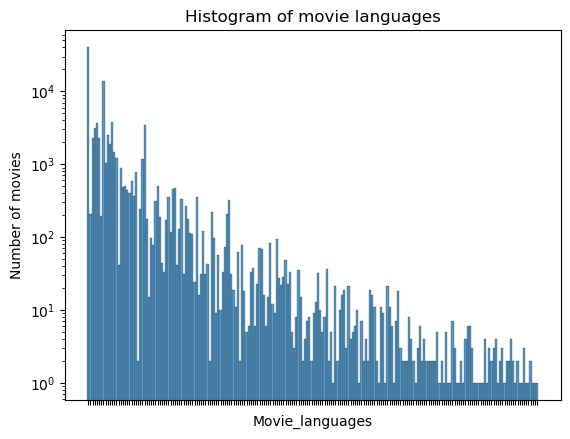

,Number_movies,Ratio,Cumsum
Movie_languages,,,
English Language,40891,42.965368,42.965368
nan,13866,14.569411,57.534779
Hindi Language,3744,3.933930,61.468709
Spanish Language,3673,3.859328,65.328038
French Language,3422,3.595595,68.923633
...,...,...,...
Picard Language,1,0.001051,99.995797
Sunda Language,1,0.001051,99.996848
Sumerian,1,0.001051,99.997899


In [36]:
plt.figure()
g = sns.histplot(data=movie_languages, x='Movie_languages')
g.set(xticklabels=[])
g.set_title('Histogram of movie languages')
g.set_ylabel('Number of movies')
plt.yscale('log')
plt.show()

number_movie_languages_sorted = movie_languages.groupby(by = 'Movie_languages').count().sort_values(
                                                            by = 'Wikipedia_movie_ID', ascending = False)
number_movie_languages_sorted = number_movie_languages_sorted.rename(columns = {'Wikipedia_movie_ID': 'Number_movies'})
tot_movies_languages = number_movie_languages_sorted.sum()
number_movie_languages_sorted['Ratio'] = number_movie_languages_sorted*100/tot_movies_languages
number_movie_languages_sorted['Cumsum'] = number_movie_languages_sorted['Ratio'].cumsum()

number_movie_languages_sorted

**Clean + distributions of movie_countries**

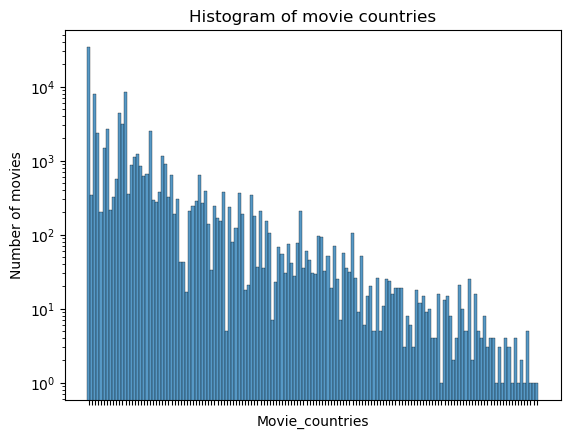

,Number_movies,Ratio,Cumsum
Movie_countries,,,
United States of America,34408,39.806106,39.806106
India,8411,9.730561,49.536667
United Kingdom,7868,9.102373,58.639040
France,4395,5.084510,63.723551
Italy,3163,3.659228,67.382779
...,...,...,...
Ukranian SSR,1,0.001157,99.995372
Iraqi Kurdistan,1,0.001157,99.996529
Macau,1,0.001157,99.997686


In [37]:
movie_countries.Movie_countries.unique()

plt.figure()
g = sns.histplot(data=movie_countries, x='Movie_countries')
g.set(xticklabels=[])
g.set_title('Histogram of movie countries')
g.set_ylabel('Number of movies')
plt.yscale('log')
plt.show()

number_movie_countries_sorted = movie_countries.groupby(by = 'Movie_countries').count().sort_values(
                                                            by = 'Wikipedia_movie_ID', ascending = False)
number_movie_countries_sorted = number_movie_countries_sorted.rename(columns = {'Wikipedia_movie_ID': 'Number_movies'})
tot_movies_countries = number_movie_countries_sorted.sum()

number_movie_countries_sorted['Ratio'] = number_movie_countries_sorted*100/tot_movies_countries
number_movie_countries_sorted['Cumsum'] = number_movie_countries_sorted['Ratio'].cumsum()

number_movie_countries_sorted

**Clean + distributions of movie_genres**

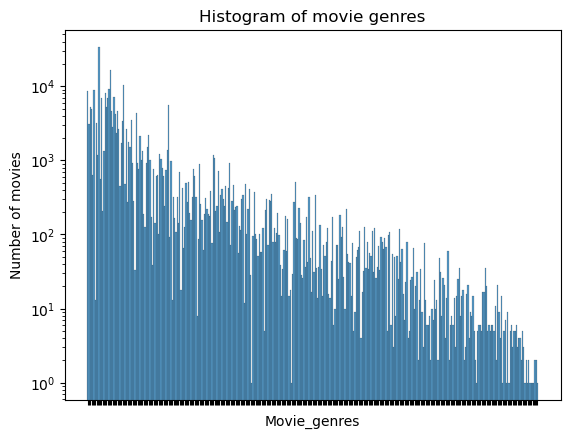

,Number_movies,Ratio,Cumsum
Movie_genres,,,
Drama,34007,13.975728,13.975728
Comedy,16349,6.718887,20.694615
Romance Film,10234,4.205828,24.900443
Black-and-white,9094,3.737327,28.637770
Action,8798,3.615681,32.253451
...,...,...,...
Comdedy,1,0.000411,99.998356
New Queer Cinema,1,0.000411,99.998767
Linguistics,1,0.000411,99.999178


In [38]:
movie_genres.Movie_genres.unique()

#replace Biopic [feature] by Biopic
movie_genres.loc[movie_genres.Movie_genres == 'Biopic [feature]','Movie_genres'] = 'Biopic'


plt.figure()
g = sns.histplot(data=movie_genres, x='Movie_genres')
g.set(xticklabels=[])
plt.yscale('log')
g.set_title('Histogram of movie genres')
g.set_ylabel('Number of movies')
plt.show()


number_movie_genres_sorted = movie_genres.groupby(by = 'Movie_genres').count().sort_values(
                                                            by = 'Wikipedia_movie_ID', ascending = False)
number_movie_genres_sorted = number_movie_genres_sorted.rename(columns = {'Wikipedia_movie_ID': 'Number_movies'})
tot_movies_genres = number_movie_genres_sorted.sum()

number_movie_genres_sorted['Ratio'] = number_movie_genres_sorted*100/tot_movies_genres
number_movie_genres_sorted['Cumsum'] = number_movie_genres_sorted['Ratio'].cumsum()
number_movie_genres_sorted

# 4. character.metadata.tsv.gz [14 M]

Metadata for 450,669 characters aligned to the movies above, extracted from the Noverber 4, 2012 dump of Freebase.  Tab-separated; columns:

1. Wikipedia movie ID
2. Freebase movie ID
3. Movie release date
4. Character name
5. Actor date of birth
6. Actor gender
7. Actor height (in meters)
8. Actor ethnicity (Freebase ID)
9. Actor name
10. Actor age at movie release
11. Freebase character/actor map ID
12. Freebase character ID
13. Freebase actor ID

In [39]:
colnames=['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_release_date', 'Character_name','Actor_date_of_birth', 'Actor_gender', 'Actor_height', 'Actor_ethnicity', 'Actor_name', 'Actor_age_at_movie_release', 'Freebase_character/actor_map_ID', 'Freebase_character_ID', 'Freebase_actor_ID'] 

character_md = pd.read_csv('data/MovieSummaries/character.metadata.tsv', sep='\t',names = colnames, header=None)
character_md.head(5)


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


tvtropes.clusters.txt

72 character types drawn from tvtropes.com, along with 501 instances of those types.  The ID field indexes into the Freebase character/actor map ID in character.metadata.tsv.

In [40]:
with open('data/MovieSummaries/tvtropes.clusters.txt', encoding='utf8') as f:
    lines = f.read()
    #print(lines)
    
print(lines)

absent_minded_professor	{"char": "Professor Philip Brainard", "movie": "Flubber", "id": "/m/0jy9q0", "actor": "Robin Williams"}
absent_minded_professor	{"char": "Professor Keenbean", "movie": "Richie Rich", "id": "/m/02vchl3", "actor": "Michael McShane"}
absent_minded_professor	{"char": "Dr. Reinhardt Lane", "movie": "The Shadow", "id": "/m/0k6fkc", "actor": "Ian McKellen"}
absent_minded_professor	{"char": "Dr. Harold Medford", "movie": "Them!", "id": "/m/0k6_br", "actor": "Edmund Gwenn"}
absent_minded_professor	{"char": "Daniel Jackson", "movie": "Stargate", "id": "/m/0k3rhh", "actor": "James Spader"}
adventurer_archaeologist	{"char": "Indiana Jones", "movie": "Indiana Jones and the Kingdom of the Crystal Skull", "id": "/m/0jzx78", "actor": "Harrison Ford"}
adventurer_archaeologist	{"char": "Indiana Jones", "movie": "Indiana Jones and the Raiders of the Lost Ark", "id": "/m/0k294p", "actor": "Harrison Ford"}
adventurer_archaeologist	{"char": "Indiana Jones", "movie": "Indiana Jones an

name.clusters.txt


970 unique character names used in at least two different movies, along with 2,666 instances of those types.  The ID field indexes into the Freebase character/actor map ID in character.metadata.tsv.

In [41]:
with open('data/MovieSummaries/name.clusters.txt', encoding='utf8') as f:
    lines = f.read()
print(lines)

Stuart Little	/m/0k3w9c
Stuart Little	/m/0k3wcx
Stuart Little	/m/0k3wbn
John Doe	/m/0jyg35
John Doe	/m/0k2_zn
Josh Framm	/m/0jt3p3
Josh Framm	/m/0jt3t3
Caspian X	/m/0646flc
Caspian X	/m/02vd12n
Apostle Peter	/m/02vd6_v
Apostle Peter	/m/03lqtky
Apostle Peter	/m/02vcr4g
Van Wilder	/m/05t9vyx
Van Wilder	/m/0k14rv
Max Cady	/m/0jw22y
Max Cady	/m/0jw24c
The Emperor of China	/m/05yvrzt
The Emperor of China	/m/03lk812
Ludo Dekker	/m/075xnnb
Ludo Dekker	/m/04lr9d9
Veer Pratap Singh	/m/0dgb3pv
Veer Pratap Singh	/m/05tb5t7
Veer Pratap Singh	/m/0h82lw6
John McClane	/m/0jx8f8
John McClane	/m/0jx8dk
Jack Cates	/m/0jskgc
Jack Cates	/m/0jtmhj
Shorty Meeks	/m/0k2yyr
Shorty Meeks	/m/02vcwky
Fievel Mousekewitz	/m/0jtgf0
Fievel Mousekewitz	/m/0669ryp
Fievel Mousekewitz	/m/0669ryh
Fievel Mousekewitz	/m/0jtgh6
Kazuya Mishima	/m/05sw_3g
Kazuya Mishima	/m/0ggd_08
Darth Vader	/m/02nwtmm
Darth Vader	/m/02nwtmz
Queen Victoria	/m/02vc38l
Queen Victoria	/m/04dch0t
Queen Victoria	/m/0gwdbnp
Billy Fish	/m/0k3w17
Bil